# Langmuir probe data

Langmuir probes are the bread and butter of plasma diagnsotics. In AUG they are spread through the inner and outer divertors. Some of them tend to go MIA in some days, so always check out for individual signals. The naming convention is always something like "ua1". The first "u" is for "unten" (lower), so the first letter can be either "u" or "o" (oben). The second letter can be "a" for "ausen" (outer), "i" for "innen" (inner) or "m" for "mitte" (middle, in the lower divertor roof baffle).

Reading temperature and density for the probes is straightforward, as the information is stored in the `LSD` shotfile (yep, LSD, *LangmuirSondenDaten, jungs*). To get the particular info, you can compose the name of the signal by adding the prefix `te-` for temperature and `ne-` for density. 

Reading jsat information, however, is a bloody nightmare. Ain't nobody got time for that.

It is much easier to read data from the `DIVERTOR` programme written by Steffen Potzel and outputting ASCII files than you reading the data itself. There are some functions to read data outputted by DIVERTOR.

In [1]:
from ipfnpytools.getsig import getsig
import matplotlib.pyplot as plt
plt.style.use('./Styles/darklab.mplstyle')

In [2]:
shotnr = 29864
telfs = getsig(shotnr, 'LSD', 'te-ua4')
nelfs = getsig(shotnr, 'LSD', 'ne-ua4')

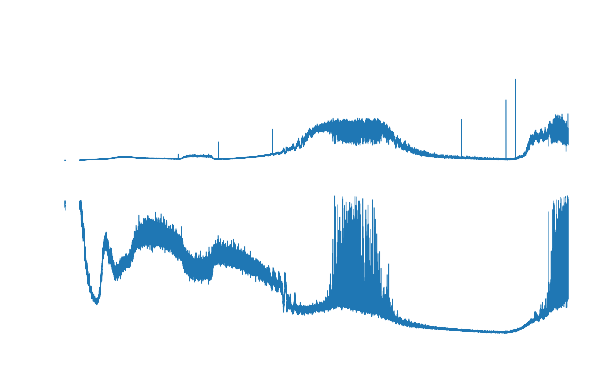

In [4]:
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=100)

ax[0].plot(nelfs.time, nelfs.data*1e-19, lw=0.4)
ax[1].plot(telfs.time, telfs.data, lw=0.4)

ax[0].set_ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')
ax[1].set_ylabel('T [eV]')

ax[0].set_ylim(bottom=0)
ax[1].set_ylim(bottom=0)

ax[1].set_xlabel('time [s]')
ax[1].set_xlim(1,4)
plt.tight_layout()
plt.show()

## Reading DIVERTOR output

In [4]:
from ipfnpytools.readStark import readDivData
from ipfnpytools.getsig import getsig
from scipy.interpolate import interp2d
import matplotlib as mpl #Special axes arrangement for colorbars
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./Styles/darklab.mplstyle')

In [5]:
jsat_out = readDivData('./Files/3D_29864_jsat_out.dat')
h1 = getsig(29864, 'DCN', 'H-1')
h5 = getsig(29864, 'DCN', 'H-5')
dtot = getsig(29864, 'UVS', 'D_tot')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(err_txt, RuntimeWarning)


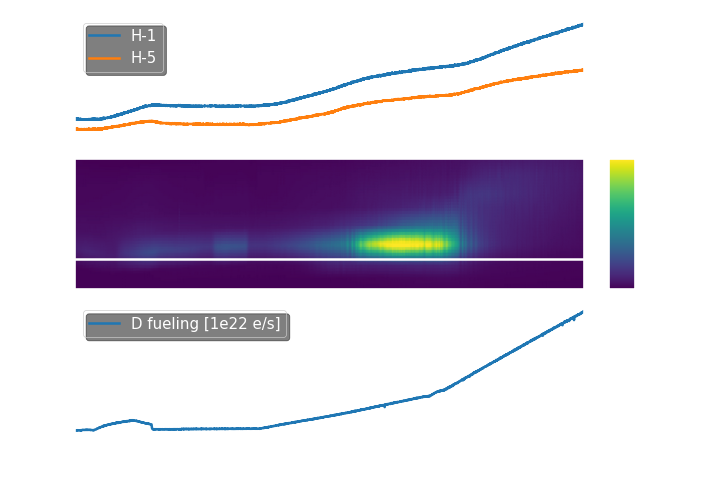

In [8]:
fig = plt.figure(dpi=120)

#Initial and Final time points
tBegin = 1.0
tEnd = 3.6

#2x2 array, left side for plotting, right side for placing colorbar, hence the ratios
gs = mpl.gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[5, 1])

#Top plot
ax0 = fig.add_subplot(gs[0, 0])

ax0.plot(h1.time, h1.data*1e-19, label='H-1')
ax0.plot(h5.time, h5.data*1e-19, label='H-5')
ax0.set_ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')
ax0.set_ylim(bottom=0)
ax0.legend()

#Middle plot
ax1 = fig.add_subplot(gs[1, 0], sharex=ax0)

vmax = 15
clrb = ax1.pcolormesh(jsat_out.time, jsat_out.deltas, jsat_out.data, vmax=vmax, shading='gouraud', cmap='viridis')

axins = inset_axes(ax1,
                   width="5%", # width = 10% of parent_bbox width
                   height="100%", # height : 50%
                   loc=6,
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0)

cbar = plt.colorbar(clrb, cax=axins, ticks=(np.arange(0.0, vmax+1.0, 3.0)))
cbar.set_label(r'$\mathrm{\Gamma_{D^{+}}\,[10^{22}\,e/m^{-2}]}$')

#Strike point line
ax1.axhline(0.0, color='w')
ax1.set_ylabel(r'$\mathrm{\Delta s\,[cm]}$')
ax1.set_ylim(-5,17)
ax1.set_yticks([-5,0,5,10,15])


##This is just the middle figure, but 2D-interpolated
#Bottom plot
ax2 = fig.add_subplot(gs[2, 0], sharex=ax0)

ax2.plot(dtot.time, dtot.data*1e-22, label='D fueling [1e22 e/s]')
ax2.set_ylim(bottom=0)
ax2.legend()

#Remove ticks from top and middle plot
plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)

ax0.set_xlim(tBegin, tEnd)
ax2.set_xlabel('time [s]')

plt.subplots_adjust(left=0.1, right=0.99, bottom=0.11, top=0.98, wspace=0.10, hspace=0.11)
#plt.tight_layout()
plt.savefig('./Images/test.png', dpi=300, transparent=True)
plt.show()